## Moving Average Model (MA)
In a moving average model of order 1, i.e, MA(1) the model is $y[t] = \mu + \epsilon[t] - \theta \epsilon[t-1]$ where $\epsilon[.]$ denotes the noise. MA(1) refer to one lag error in the error term.
- MA are always **stationary** process;
- High Frequency stock returns are an example of MA(1) process;
- e.g. MA(3) model is $y[t] = \mu + \epsilon[t] - \theta_{1} \epsilon[t-1] - \theta_{2} \epsilon[t-2] - \theta_{3} \epsilon[t-3]$

In [8]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model   import ARMA
import matplotlib.pyplot as plt
import numpy as np

### Simulate MA(1) Time Series

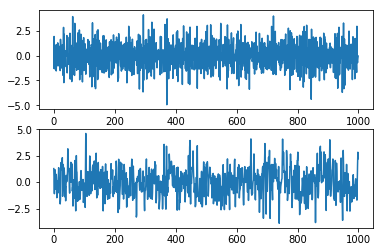

In [3]:
# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()

### Plot autocorrelation function

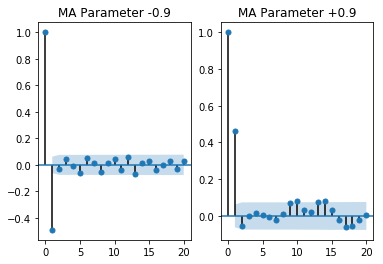

In [7]:
# Plot three ACF on same page for comparison using subplots
fig, axes = plt.subplots(1,2)

# Plot 1: AR parameter = -0.9
plot_acf(simulated_data_1, lags=20, ax=axes[0])
axes[0].set_title("MA Parameter -0.9")

# Plot 2: AR parameter = +0.9
plot_acf(simulated_data_2, lags=20, ax=axes[1])
axes[1].set_title("MA Parameter +0.9")
plt.show()

### Estimation MA model

In [9]:
# Fit an MA(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(0, 1))
res = mod.fit()
# Print out summary information on the fit
print(res.summary())
# Print out the estimate for the constant and for theta
print(f"When the true theta=-0.9, the estimate of theta (and the constant) are: {res.params}")

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1417.071
Method:                       css-mle   S.D. of innovations              0.997
Date:                Tue, 19 Mar 2019   AIC                           2840.142
Time:                        16:15:52   BIC                           2854.866
Sample:                             0   HQIC                          2845.738
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0057      0.003      1.900      0.058      -0.000       0.012
ma.L1.y       -0.9053      0.013    -68.494      0.000      -0.931      -0.879
                                    Roots           

### Forecast MA model

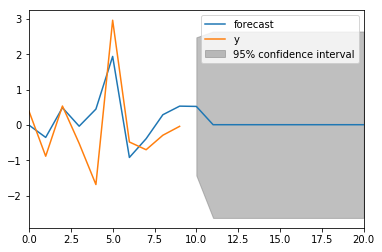

In [11]:
res.plot_predict(start=990, end=1010)
plt.show()

Note that forecasting with MA(1) after one-step ahead will be all the same. 